# BAB PENGENALAN

    Nama  : Farand Austen Mahesa
    Kelas : Full Bootcamp Data Science

Tujuan Program
>Pada program ini akan dilakukan Linear Regression pada Model Inference yang akan dibuat


Isi notebook dibawah ini berupa:
   - Perkenalan
   - Import pustaka yang dibutuhkan
   - Data Loading
   - Data Cleaning
   - Eksplorasi Data
   - Data Preprocessing
   - Pendefinisian Model
   - Pelatihan Model
   - Evaluasi Model
   - Model Inference
   - Pengambilan Kesimpulan

# Import Pustaka

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import time

# Preprocessing

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df['datetime'] = pd.to_datetime(df['datetime']).dt.normalize()

In [5]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
df['day'].unique()

array([16, 27, 28, 30, 29, 17, 26,  2,  3, 13, 14,  1, 18, 15,  4, 10,  9],
      dtype=int64)

In [7]:
df['hour'].unique()

array([ 9,  2,  1,  4,  3, 18,  5, 19,  6, 10, 16, 22, 23,  0, 14, 11,  7,
       20, 13,  8, 12, 21, 17, 15], dtype=int64)

In [8]:
dfprice = df.set_index('datetime')
dfhour = df.set_index('hour')

In [9]:
dfhour.isnull().sum()

id                                 0
timestamp                          0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
t

In [10]:
dfhour['price'].fillna(0, inplace =True)

In [11]:
dfhour.isnull().sum()

id                             0
timestamp                      0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

In [12]:
df.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

In [13]:
df=pd.get_dummies(df,columns=['destination'],drop_first=False)
df=pd.get_dummies(df,columns=['icon'],drop_first=False)
df=pd.get_dummies(df,columns=['name'],drop_first=False)
df=pd.get_dummies(df,columns=['product_id'],drop_first=False)

In [14]:
df.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276,-0.000971,-0.000399,-0.000246,0.003024,0.003160,-0.001344,0.001132,-0.001529,-0.002255,-0.000135,0.000645,-0.001119,0.091179,0.012448,0.115698,-0.075200,-0.015965,-0.022989,-0.141782,-0.000314,-0.000099,-0.001467,0.000340,-0.000036,-0.001249,0.000077,0.000713,0.000318,0.000709,0.001858,-0.000895,-0.000008,0.001858,-0.000314,-0.000099,-0.000895,0.000318,0.000709,-0.000008,-0.001249,0.000713,0.000340,-0.000036,0.000077,-0.001467
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785,0.002382,0.002347,0.000793,0.000083,-0.000790,0.001030,-0.000059,0.000441,0.001974,-0.006042,-0.001025,-0.001122,0.110412,-0.264277,0.095141,-0.062470,0.292185,-0.129306,-0.107706,-0.001263,-0.000429,0.000240,0.000553,0.000082,0.002343,-0.000381,-0.000449,0.000298,0.000095,-0.001534,0.000022,0.000503,-0.001534,-0.001263,-0.000429,0.000022,0.000298,0.000095,0.000503,0.002343,-0.000449,0.000553,0.000082,-0.000381,0.000240
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411,0.003734,0.000907,-0.001347,-0.003951,0.000800,-0.001195,0.003255,0.002734,-0.002406,-0.001

Hanya untuk cek korelasi mana yang besar yang nantinya akan dipasang menjadi kolom.

# LINEAR REGRESSION

In [15]:
dfhour = dfhour[["price", 'sunsetTime', 'sunriseTime', "name", "icon", 
                 "destination", "distance", "surge_multiplier", "short_summary", 
                 "source", "windSpeed", "windGust", 'temperature','product_id']]

<AxesSubplot:>

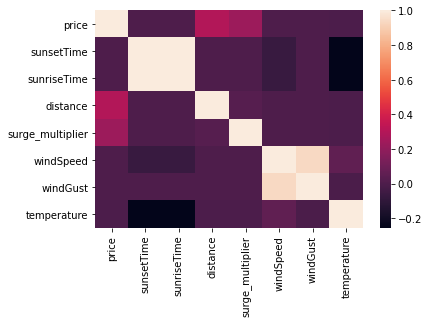

In [16]:
sns.heatmap(dfhour.corr())

In [17]:
dfhour

,price,sunsetTime,sunriseTime,name,icon,destination,distance,surge_multiplier,short_summary,source,windSpeed,windGust,temperature,product_id
hour,,,,,,,,,,,,,,
9,5.0,1544994864,1544962084,Shared,partly-cloudy-night,North Station,0.44,1.0,Mostly Cloudy,Haymarket Square,8.66,9.17,42.34,lyft_line
2,11.0,1543266992,1543232969,Lux,rain,North Station,0.44,1.0,Rain,Haymarket Square,11.98,11.98,43.58,lyft_premier
1,7.0,1543353364,1543319437,Lyft,clear-night,North Station,0.44,1.0,Clear,Haymarket Square,7.33,7.33,38.33,lyft
4,26.0,1543526114,1543492370,Lux Black XL,clear-night,North Station,0.44,1.0,Clear,Haymarket Square,5.28,5.28,34.38,lyft_luxsuv
3,9.0,1543439738,1543405904,Lyft XL,partly-cloudy-night,North Station,0.44,1.0,Partly Cloudy,Haymarket Square,9.14,9.14,37.44,lyft_plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,13.0,1543698855,1543665331,UberXL,partly-cloudy-night,North End,1.00,1.0,Partly Cloudy,West End,2.34,2.87,37.05,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
23,9.5,1543698855,1543665331,UberX,partly-cloudy-night,North End,1.00,1.0,Partly Cloudy,West End,2.34,2.87,37.05,55c66225-fbe7-4fd5-9072-eab1ece5e23e
23,0.0,1543698855,1543665331,Taxi,partly-cloudy-night,North End,1.00,1.0,Partly Cloudy,West End,2.34,2.87,37.05,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a


In [18]:
dfhour=pd.get_dummies(dfhour,columns=['short_summary'],drop_first=False)
dfhour=pd.get_dummies(dfhour,columns=['destination'],drop_first=False)
dfhour=pd.get_dummies(dfhour,columns=['source'],drop_first=False)
dfhour=pd.get_dummies(dfhour,columns=['icon'],drop_first=False)
dfhour=pd.get_dummies(dfhour,columns=['product_id'],drop_first=False)
dfhour=pd.get_dummies(dfhour,columns=['name'],drop_first=False)

In [19]:
dfhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693071 entries, 9 to 23
Data columns (total 74 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   price                                            693071 non-null  float64
 1   sunsetTime                                       693071 non-null  int64  
 2   sunriseTime                                      693071 non-null  int64  
 3   distance                                         693071 non-null  float64
 4   surge_multiplier                                 693071 non-null  float64
 5   windSpeed                                        693071 non-null  float64
 6   windGust                                         693071 non-null  float64
 7   temperature                                      693071 non-null  float64
 8   short_summary_ Clear                             693071 non-null  uint8  
 9   short_summary_ Driz

In [20]:
dfhour = dfhour.apply(pd.to_numeric)

In [21]:
dfhour.dropna(axis=0, how='any', inplace=True)

X = dfhour.drop(columns='price')
y = dfhour['price']

In [22]:
X

,sunsetTime,sunriseTime,distance,surge_multiplier,windSpeed,windGust,temperature,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,1544994864,1544962084,0.44,1.0,8.66,9.17,42.34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1543266992,1543232969,0.44,1.0,11.98,11.98,43.58,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1543353364,1543319437,0.44,1.0,7.33,7.33,38.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1543526114,1543492370,0.44,1.0,5.28,5.28,34.38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1543439738,1543405904,0.44,1.0,9.14,9.14,37.44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1543698855,1543665331,1.00,1.0,2.34,2.87,37.05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23,1543698855,1543665331,1.00,1.0,2.34,2.87,37.05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23,1543698855,1543665331,1.00,1.0,2.34,2.87,37.05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69)

In [24]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

X_test2 = X_test.copy()
y_pred = model.predict(X_test)

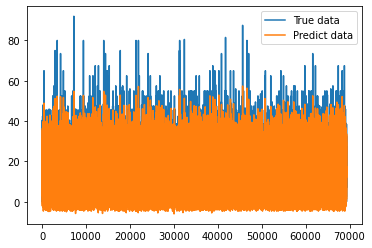

In [25]:
fig,ax = plt.subplots()

plt.rcParams['agg.path.chunksize'] = 10000
y_test_reset = y_test.reset_index(drop=True)

ax.plot(y_test_reset.index.values, y_test, label='True data')
ax.plot(y_test_reset.index.values, y_pred, label='Predict data')
plt.legend()

In [26]:
diff1 = y_test -  y_pred
error1 = np.sqrt(np.mean(np.power(diff1,2)))
print('Error setelah diprediksi: %.3f' %error1)

Error setelah diprediksi: 2.542


In [27]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.2f' %mse)

MSE: 6.46


In [28]:
r2_scoree = r2_score(y_test, y_pred)
print('Score Akurasi: %.3f' %r2_scoree)

Score Akurasi: 0.935


In [29]:
mae2 = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %.3f' %mae2)

Mean Absolute Error: 1.797


In [30]:
params = pd.Series(model.coef_, index=X_test.columns)
pd.set_option('display.max_rows', None)

In [31]:
from sklearn.utils import resample
import numpy as np
np.random.seed(1)
err = np.std([model.fit(*resample(X_test, y_test)).coef_
              for i in range(1000)], 0)

In [32]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))
pd.set_option('display.max_rows', None)

                                                 effect  error
sunsetTime                                         -0.0    0.0
sunriseTime                                         0.0    0.0
distance                                            3.0    0.0
surge_multiplier                                   19.0    0.0
windSpeed                                          -0.0    0.0
windGust                                            0.0    0.0
temperature                                         0.0    0.0
short_summary_ Clear                               -0.0   71.0
short_summary_ Drizzle                             -0.0   21.0
short_summary_ Foggy                               -0.0   54.0
short_summary_ Light Rain                          -0.0   21.0
short_summary_ Mostly Cloudy                       -0.0   54.0
short_summary_ Overcast                            -0.0   54.0
short_summary_ Partly Cloudy                       -0.0   54.0
short_summary_ Possible Drizzle                    -0.0

# MODEL INFERENCE

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=69)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [35]:
def z_scoring(arrays):
    arr_mean = arrays.mean()
    arr_std = arrays.std()
    arr_rst = (arrays-arr_mean)/arr_std
    return arr_rst,arr_mean,arr_std

def restore_z_score(arrays,arr_mean,arr_std):
    return arrays*arr_std+arr_mean

In [36]:
X_train_trf = scaler.transform(X_train) 
y_train_trf,y_mean,y_std = z_scoring(y_train)

In [37]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train_trf, y_train_trf)

LinearRegression(fit_intercept=False)

In [38]:
X_val_trf = scaler.transform(X_val)

In [39]:
model_pred = model.predict(X_val_trf)
prediction = restore_z_score(model_pred,y_mean,y_std)

In [40]:
selisih = y_val - prediction

<AxesSubplot:>

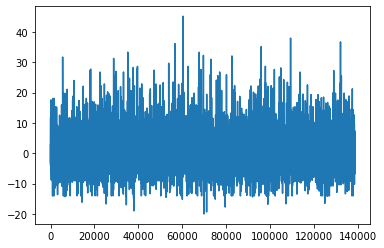

In [41]:
selisih.reset_index(drop=True).plot()

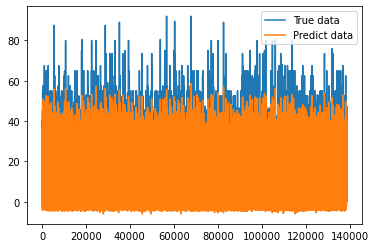

In [42]:
fig,ax = plt.subplots()

plt.rcParams['agg.path.chunksize'] = 10000
y_val_reset = y_val.reset_index(drop=True)

ax.plot(y_val_reset.index.values, y_val, label='True data')
ax.plot(y_val_reset.index.values, prediction, label='Predict data')
plt.legend()

In [43]:
diff2 = y_val - prediction
error2 = np.sqrt(np.mean(np.power(diff2,2)))
print('Error setelah diprediksi: %.3f' %error2)

Error setelah diprediksi: 2.573


In [44]:
mse = mean_squared_error(y_val, prediction)
print('Mean Squared Error: %.2f' %mse)

Mean Squared Error: 6.62


In [45]:
r2_scoree = r2_score(y_val, prediction)
print('Score Akurasi: %.3f' %r2_scoree)

Score Akurasi: 0.934


In [46]:
mae = mean_absolute_error(y_val, prediction)
print('Mean Absolute Error: %.3f' %mae)

Mean Absolute Error: 1.806


# Overall Analysis

# Sebelum di scale: 

- Mean Squared Error: 6,46
- Score Akurasi: 0,935
- Mean Absolute Error: 1,797
- Error setelah diprediksi: 2,542

Sebelum ini di scale, X memiliki tipedata dataframe lalu, dilakukan linier regresi dan hasilnya positif, dengan error sedikit, sebenernya tabel ini sudah cocok dilakukan linier regresi dimana pastinya dimana surge multiplier, product_id_lyft_luxsuv, name_Lux Black XL memberikan efek yang besar pada price sehingga menyebabkan price bisa turun ataupun naik

Predicted price ini berhenti di angka 60 dan tidak dapat menyentuh angka setelahnya sedangkan dari Predictor Price yaitu ada yang > 60 yang tidak terprediksi, dan score akurasi 0,935 yang artinya predictor price ini cukup akurat untuk mendapatkan hasilnya

# Setelah di scale:

- Mean Squared Error: 6.62
- Score Akurasi: 0,934
- Mean Absolute Error: 1.806
- Error setelah diprediksi: 2,573

Setelah ini di scale, X memiliki tipedata numpy.ndarray, lalu dilakukan linier regresi dan hasilnya sama aja seperti sebelum di scale, dengan error yang sama aja, sebenernya tipe data jika itu dataframe dan ndarray itu sama saja jika dilakukan linier regresi

Predicted price ini menurun dan berhenti di angka 60 dan tidak dapat menyentuh angka maksimal dari Predictor Price yaitu 80, tidak dapat menyentuh angka setelahnya sedangkan dari Predictor Price yaitu ada yang > 60 yang tidak terprediksi, dengan skor 0.934 bahwa predictor skor cukup akurat

Sebelum dan setelah di scale sama aja untuk linier regresi tetap mendapatkan keakuratan dan error yang tidak jauh berbeda